In [127]:
import numpy
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from generateXdata import generateX


In [128]:
import os
filename = os.path.join("dataforfinalproject","RECS_COMBINED_DATA.csv")
dataset=read_csv(filename)

In [129]:
dataset.describe()

,RECSYEAR,DOEID,REGIONC,DIVISION,TYPEHUQ,CELLAR,STORIES,PRKGPLC1,YEARMADE,OCCUPYY,...,WDPELLET,WDOTHER,WDWARM,WDWATER,USESOLAR,SOLWATER,SOLOTHER,TVAUDIOEQUIP,PCOFFEQUIP,PHONE
count,22591.00,22591.00,22591.00,22591.00,22591.00,22591.00,22591.00,22591.00,22591.00,22591.00,...,22591.00,22591.00,22591.00,2.26e+04,22591.00,2.26e+04,2.26e+04,22591.00,22591.00,22591.00
mean,2008.80,7195.13,2.65,5.38,2.64,0.14,15.25,0.48,4.05,6.80,...,0.26,-1.39,0.11,1.28e-03,0.01,2.52e-03,6.99e-03,6.70,2.76,1.53
std,4.76,4402.42,1.05,2.82,1.18,2.25,20.10,2.24,2.25,1.99,...,4.18,0.93,0.32,3.58e-02,0.10,5.02e-02,8.33e-02,3.74,2.34,1.12
min,2001.00,1.00,1.00,1.00,1.00,-2.00,-2.00,-2.00,1.00,1.00,...,-2.00,-2.00,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00
25%,2009.00,3330.00,2.00,3.00,2.00,-2.00,10.00,0.00,2.00,6.00,...,-2.00,-2.00,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,4.00,1.00,1.00
50%,2009.00,6474.00,3.00,5.00,2.00,0.00,10.00,0.00,4.00,7.00,...,-2.00,-2.00,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,6.00,3.00,2.00
75%,2015.00,11061.00,3.00,7.00,3.00,1.00,20.00,1.00,6.00,8.00,...,0.00,0.00,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,9.00,4.00,2.00
max,2015.00,15686.00,4.00,10.00,5.00,9.00,99.00,9.00,13.00,9.00,...,9.00,1.00,1.00,1.00e+00,1.00,1.00e+00,1.00e+00,43.00,23.00,10.00


In [130]:
set_option('precision', 2)
dataset.corr(method='spearman')

,RECSYEAR,DOEID,REGIONC,DIVISION,TYPEHUQ,CELLAR,STORIES,PRKGPLC1,YEARMADE,OCCUPYY,...,WDPELLET,WDOTHER,WDWARM,WDWATER,USESOLAR,SOLWATER,SOLOTHER,TVAUDIOEQUIP,PCOFFEQUIP,PHONE
RECSYEAR,1.00e+00,7.24e-01,5.64e-02,7.32e-02,-1.21e-02,-5.00e-01,-2.49e-01,-1.99e-01,2.27e-02,-2.57e-01,...,-6.78e-01,-6.19e-01,-3.65e-02,-7.29e-03,-2.26e-02,-1.68e-02,2.28e-03,2.81e-02,2.32e-01,4.70e-02
DOEID,7.24e-01,1.00e+00,5.00e-02,5.73e-02,-1.23e-02,-3.58e-01,-1.30e-01,-1.03e-01,4.04e-02,-1.38e-01,...,-3.78e-01,-3.44e-01,-1.28e-02,-7.12e-03,-1.08e-02,-8.13e-03,-1.78e-03,1.63e-03,1.55e-01,1.27e-01
REGIONC,5.64e-02,5.00e-02,1.00e+00,9.70e-01,-6.03e-02,-3.04e-01,-1.09e-01,4.58e-02,2.02e-01,1.59e-02,...,-3.22e-02,-2.45e-02,1.54e-02,-2.85e-02,4.36e-02,4.07e-02,3.24e-02,-3.49e-03,3.24e-02,-8.78e-03
DIVISION,7.32e-02,5.73e-02,9.70e-01,1.00e+00,-5.64e-02,-3.23e-01,-1.29e-01,3.59e-02,1.80e-01,8.72e-03,...,-5.65e-02,-4.74e-02,9.36e-03,-2.58e-02,3.62e-02,3.60e-02,2.78e-02,-6.94e-03,3.07e-02,-1.84e-02
TYPEHUQ,-1.21e-02,-1.23e-02,-6.03e-02,-5.64e-02,1.00e+00,-1.93e-01,-3.55e-01,-3.02e-01,-6.82e-02,1.11e-01,...,-6.32e-02,-8.83e-02,-1.55e-01,-2.04e-02,-3.62e-02,-8.48e-03,-3.73e-02,-2.38e-01,-1.59e-01,-1.65e-01
CELLAR,-5.00e-01,-3.58e-01,-3.04e-01,-3.23e-01,-1.93e-01,1.00e+00,5.64e-01,4.08e-01,-1.27e-01,-1.63e-02,...,3.89e-01,3.66e-01,7.65e-02,2.45e-02,1.27e-02,-1.72e-04,7.14e-03,1.35e-01,1.98e-02,7.63e-02
STORIES,-2.49e-01,-1.30e-01,-1.09e-01,-1.29e-01,-3.55e-01,5.64e-01,1.00e+00,6.11e-01,6.46e-02,-6.73e-02,...,3.38e-01,3.23e-01,9.59e-02,1.64e-02,3.38e-02,1.67e-02,2.36e-02,2.06e-01,1.49e-01,2.11e-01
PRKGPLC1,-1.99e-01,-1.03e-01,4.58e-02,3.59e-02,-3.02e-01,4.08e-01,6.11e-01,1.00e+00,2.24e-01,-9.07e-02,...,2.90e-01,2.79e-01,8.70e-02,5.53e-03,4.32e-02,1.66e-02,3.75e-02,2.18e-01,1.81e-01,2.27e-01
YEARMADE,2.27e-02,4.04e-02,2.02e-01,1.80e-01,-6.82e-02,-1.27e-01,6.46e-02,2.24e-01,1.00e+00,1.22e-01,...,3.95e-02,3.71e-02,1.15e-02,1.98e-03,1.38e-02,1.34e-02,8.72e-03,1.30e-01,1.22e-01,1.21e-01
OCCUPYY,-2.57e-01,-1.38e-01,1.59e-02,8.72e-03,1.11e-01,-1.63e-02,-6.73e-02,-9.07e-02,1.22e-01,1.00e+00,...,2.45e-01,2.17e-01,-1.42e-02,3.90e-03,-1.06e-02,3.70e-03,-3.16e-02,-6.22e-02,-1.09e-01,-1.58e-02


In [131]:
cost=dataset['TOTALDOLLAR']

energy_exp= dataset['TOTALBTU']

In [107]:
cost

0         2767.00
1         1609.00
2          820.00
3        13441.00
4         1170.00
5          664.00
6          876.00
7         1086.00
8         2653.00
9          787.00
10        1809.00
11        2126.00
12        1605.00
13         377.00
14        1885.00
15        1024.00
16         760.00
17        1337.00
18        1815.00
19         400.00
20         316.00
21         289.00
22        1228.00
23        2005.00
24         429.00
25         714.00
26         814.00
27        2223.00
28        2163.00
29        2080.00
           ...   
22561     1657.22
22562     1047.31
22563     2171.76
22564      636.29
22565     1658.77
22566     3178.63
22567      573.00
22568     3264.56
22569     1114.23
22570     3880.00
22571     2629.92
22572     4109.38
22573      852.00
22574      971.05
22575     1782.55
22576     2617.21
22577     1835.00
22578     7560.36
22579     1533.87
22580     2002.81
22581     2527.96
22582     3185.36
22583     1483.97
22584     2495.60
22585     

In [132]:
features=generateX(False,'DOLLAR')

 X Features shape : (22591, 87)
y label shape : (22591,)
cols with values as 99 and -2: ['CELLAR', 'STORIES', 'PRKGPLC1', 'BEDROOMS', 'FUELPOOL', 'SIZRFRI1', 'TYPERFR1', 'AGERFRI1', 'SIZRFRI2', 'TYPERFR2', 'AGERFRI2', 'NUMFREEZ', 'SIZFREEZ', 'AGEFRZR', 'STOVENFUEL', 'OVENUSE', 'AMTMICRO', 'DWASHUSE', 'WASHLOAD', 'WASHTEMP', 'EQUIPM', 'FUELHEAT', 'EQUIPAGE', 'PROTHERM', 'TEMPHOME', 'TEMPGONE', 'TEMPNITE', 'AGECENAC', 'USECENAC', 'NUMBERAC', 'WWACAGE', 'USEWWAC', 'FUELH2O', 'WHEATAGE', 'WHEATSIZ', 'LGTOUTNUM', 'ESDISHW', 'PGASHEAT', 'WOODAMT'] 

Duplicate Count : 0
shape of X is (22591, 86)


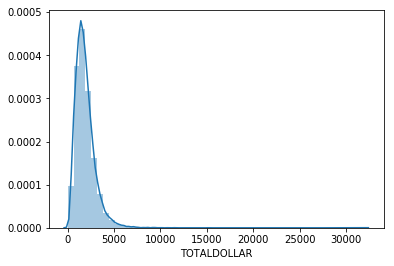

In [133]:
sns.distplot(dataset['TOTALDOLLAR']);

In [134]:
X=features

In [116]:
y = dataset['TOTALDOLLAR'].values.reshape(-1, 1)
#y =dataset['TOTALBTU'].values.reshape(-1, 1)

In [117]:
print(X.shape, y.shape)


(22591, 86) (22591, 1)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22,random_state=42)

In [119]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
predictions=model.predict(X_test)

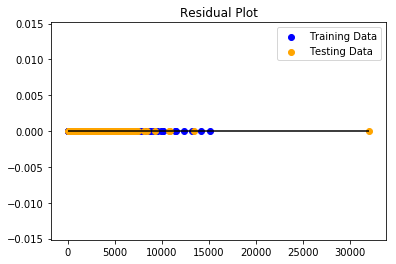

In [121]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [122]:

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.1859217551901178e-22, R2: 1.0


In [123]:
#Lasso Regression 
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = list(features.columns)
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X_train,y_train)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the datafram    
    return df

In [124]:
lasso = Lasso(alpha=0.006).fit(X_train, y_train)

predictions_train = lasso.predict(X_train)


MSE = mean_squared_error(y_train, predictions_train)
r2 = lasso.score(X_train, y_train)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.37326869942341745, R2: 0.9999996665604903


In [84]:


predictions = lasso.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

AttributeError: 'function' object has no attribute 'predict'

In [125]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn import cross_validation

In [126]:
X_train, X_test , y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5, random_state=1)
lasso = Lasso(max_iter=10000, normalize=True)
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, y_train)
print("mse = ",mean_squared_error(y_test, lasso.predict(X_test)))
print("best model coefficients:")
pd.Series(lasso.coef_)

Alpha= 0.009983898134602757
mse =  1.191444672804535
best model coefficients:


0    -0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14   -0.0
15   -0.0
16    0.0
17   -0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24   -0.0
25    0.0
26   -0.0
27    0.0
28    0.0
29   -0.0
     ... 
56   -0.0
57   -0.0
58    0.0
59   -0.0
60   -0.0
61    0.0
62   -0.0
63    0.0
64    0.0
65   -0.0
66   -0.0
67   -0.0
68    1.0
69    0.0
70    0.0
71    0.0
72    0.0
73    0.0
74    0.0
75    0.0
76   -0.0
77   -0.0
78    0.0
79   -0.0
80   -0.0
81    0.0
82    0.0
83   -0.0
84   -0.0
85   -0.0
Length: 86, dtype: float64